### **FINM 33165 (Autumn 2023) - Assignment 4**

* Yumeng Zhang (12372205)
* ymzhang@uchicago.edu

#### **Introduction**

In this assignment, we are going to implement the deterministic Encoder part of a Denoising Diffusion Probabilistic Model (DDPM). The model will input an image, then we sequentially add Gaussian noise to the image over T timestemps, and turn the image into white noise.

#### **Input the Image**

In [51]:
from PIL import Image
import numpy as np
import torch

image = Image.open('image.png').convert('RGB')
image = image.resize((600, 600))
image_array = np.array(image)
image_tensor = torch.tensor(image_array, dtype=torch.float32).permute(2, 0, 1) 

print(image_tensor.shape)

torch.Size([3, 600, 600])


Original Image:


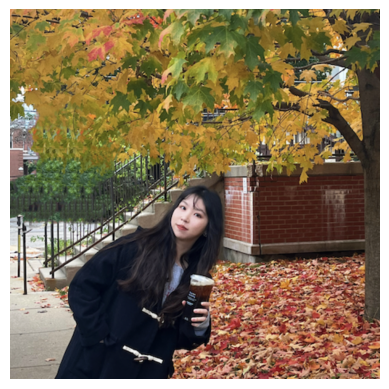

In [54]:
import matplotlib.pyplot as plt

def show_plot(image_tensor):

    plt.imshow(image_tensor.permute(1, 2, 0) / 255)
    plt.axis('off')  
    plt.show()

print("Original Image:")   # It was me at FinMath on Halloween.
show_plot(image_tensor)

#### **Add Gaussian Noise to the Image**

Assume x is the original image, and $z_t$ represents the image that we have done $t$ steps of noise adding, we are going to have a sequence of random variables $x, z_1, z_2, ... , z_T$. The sequence is a Markov chain with transition distributions $q(z_{t+1}|z_t) = \mathcal{N}(\sqrt{\alpha_t}z_t, (1-\alpha_t)\mathcal{I})$.

It follows that $z_{t+1} = \sqrt{\alpha_t}z_t + \sqrt{(1-\alpha_t)}\epsilon$, where $\epsilon \sim \mathcal{N}(0,\mathcal{I})$.

Take $z_1$ as an example, and set $\alpha = 0.99$:

In [20]:
x = image_tensor
epsilon = torch.randn_like(x) 

alpha = torch.tensor(0.99)

z1 = torch.sqrt(alpha) * x + torch.sqrt(1 - alpha) * epsilon

In [34]:
print("original image tensor:")
print(x)

original image tensor:
tensor([[[218., 210., 211.,  ..., 160., 155., 104.],
         [216., 209., 210.,  ..., 168., 135.,  61.],
         [212., 206., 209.,  ..., 170., 109.,  19.],
         ...,
         [146., 148., 146.,  ..., 148., 198., 214.],
         [148., 147., 147.,  ..., 131., 181., 209.],
         [147., 143., 146.,  ..., 192., 194., 213.]],

        [[157., 145., 143.,  ..., 152., 150., 103.],
         [149., 140., 142.,  ..., 158., 130.,  62.],
         [141., 136., 142.,  ..., 156., 104.,  20.],
         ...,
         [139., 140., 138.,  ...,  94., 138., 153.],
         [140., 140., 141.,  ...,  79., 121., 148.],
         [138., 136., 139.,  ..., 140., 136., 152.]],

        [[104.,  92.,  90.,  ...,  90.,  91.,  58.],
         [ 97.,  88.,  89.,  ...,  94.,  77.,  29.],
         [ 90.,  84.,  89.,  ...,  93.,  62.,   6.],
         ...,
         [127., 129., 128.,  ...,  80., 115., 125.],
         [128., 128., 128.,  ...,  66., 101., 121.],
         [127., 123., 126.,  .

In [33]:
print("image tensor after adding noise for one step:")
print(z1)

image tensor after adding noise for one step:
tensor([[[216.9243, 209.0992, 209.8884,  ..., 159.0556, 154.2207, 103.4183],
         [214.8373, 207.9880, 208.9256,  ..., 167.0922, 134.3062,  60.6152],
         [210.9949, 205.0641, 207.7955,  ..., 169.0417, 108.4058,  18.7668],
         ...,
         [145.3264, 147.4767, 145.1530,  ..., 147.0956, 196.8475, 213.0037],
         [147.2710, 146.2999, 146.1461,  ..., 130.4141, 180.2358, 207.9967],
         [146.1171, 142.2327, 145.4147,  ..., 190.9412, 192.9901, 212.0057]],

        [[156.1849, 144.1908, 142.4076,  ..., 151.2673, 149.0865, 102.3644],
         [147.9892, 139.1189, 141.2523,  ..., 157.1410, 129.2868,  61.5878],
         [140.1301, 135.4274, 141.2547,  ..., 155.1191, 103.3674,  19.8388],
         ...,
         [138.3432, 139.3303, 137.3767,  ...,  93.6207, 137.2124, 152.4072],
         [139.2456, 139.3100, 140.3009,  ...,  78.6242, 120.3916, 147.2506],
         [137.3450, 135.2130, 138.3611,  ..., 139.3999, 135.3529, 151.3186]],

Now we make a descending sequence of $\alpha$'s length of 500 and sequentially add noise to the image to generate increasingly noisy images $z_t$.

In [39]:
alpha_list = np.linspace(0.99, 0.5, 500)

image_list = []
image_list.append(x)

epsilon = torch.randn_like(x)

for alpha in alpha_list:

    alpha = torch.tensor(alpha)

    z_t = image_list[-1]
    z_t1 = torch.sqrt(alpha) * z_t + torch.sqrt(1 - alpha) * epsilon
    image_list.append(z_t1)

In [55]:
import torchvision.transforms as transforms

def show_plot(image_tensor):

    image_to_show = transforms.ToPILImage()(image_tensor)

    plt.imshow(image_to_show)
    plt.axis('off')  
    plt.show()

z1  alpha = 0.99


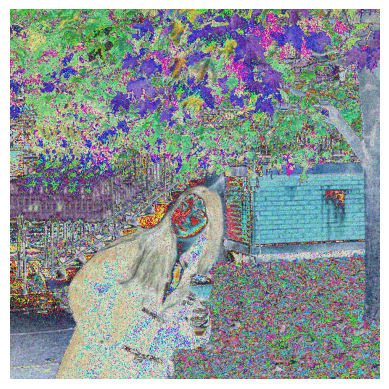

In [56]:
image_index = 0

print("z1  alpha =", alpha_list[image_index])
show_plot(image_list[image_index+1])

z2  alpha = 0.9890180360721442


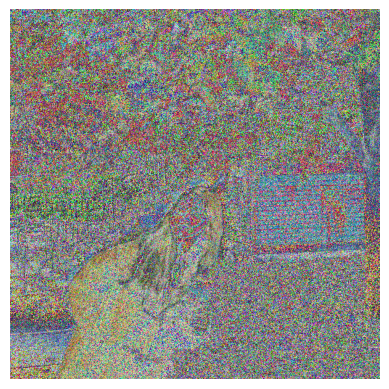

In [57]:
image_index = 1

print("z2  alpha =", alpha_list[image_index])
show_plot(image_list[image_index+1])

z3  alpha = 0.9880360721442886


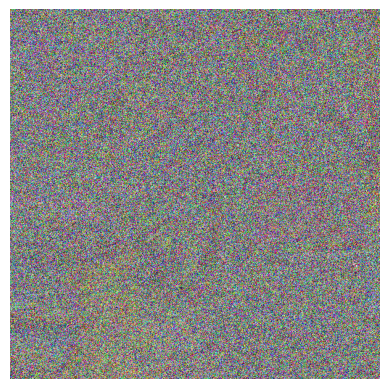

In [65]:
image_index = 2

print("z3  alpha =", alpha_list[image_index])
show_plot(image_list[image_index+1])

z500  alpha = 0.5


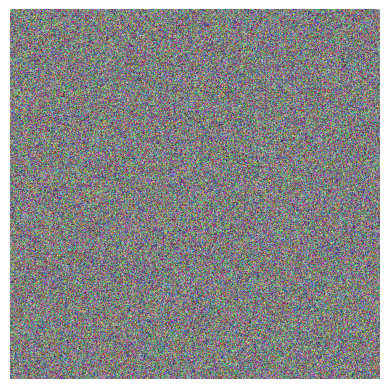

In [60]:
image_index = 499

print("z500  alpha =", alpha_list[image_index])
show_plot(image_list[image_index+1])

#### **Estimate $z_T$ to White Noise**

In [80]:
num_samples = 100
white_noise = torch.randn(num_samples, *z_T.shape)

z_T = image_list[-1]

squared_diffs1 = (white_noise - z_T)**2
average_squared_diffs1 = torch.mean(squared_diffs1, dim=(0, 1, 2, 3))
print("Average of squared differences between zT and white noise:", round(average_squared_diffs1.item(),2))

z_0 = image_list[0]

squared_diffs2 = (white_noise - z_0)**2
average_squared_diffs2 = torch.mean(squared_diffs2, dim=(0, 1, 2, 3))
print("Average of squared differences between original image and white noise:", round(average_squared_diffs2.item(),2))

Average of squared differences between zT and white noise: 6.87
Average of squared differences between original image and white noise: 12322.19


According to the above result, we could see that comparing with the original image, after adding Gaussian noises, $z_T$ is much closer to the white noise.